In [1]:
import numpy as np

from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention import AttentionSeq2seq2
from ch7.seq2seq import Seq2seq
from ch7.peeky_seq2seq import PeekySeq2seq

In [2]:
# データ読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data("dataset/date.txt")
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, x_test.shape)

x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

(45000, 29) (5000, 29)


In [3]:
print(x_train.shape, t_train.shape)
type(char_to_id), char_to_id["s"]

(45000, 29) (45000, 11)


(dict, 0)

In [4]:
# ハイパーパラメータ
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

vocab_size

59

In [5]:
model = AttentionSeq2seq2(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [6]:
%%time
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print("val acc %.3f%%" % (acc*100))

val acc 99.940%
| epoch 5 |  iter 1 / 351 | time 0[s] | loss 0.00
| epoch 5 |  iter 21 / 351 | time 6[s] | loss 0.00
| epoch 5 |  iter 41 / 351 | time 12[s] | loss 0.00
| epoch 5 |  iter 61 / 351 | time 18[s] | loss 0.00
| epoch 5 |  iter 81 / 351 | time 24[s] | loss 0.00
| epoch 5 |  iter 101 / 351 | time 30[s] | loss 0.00
| epoch 5 |  iter 121 / 351 | time 36[s] | loss 0.00
| epoch 5 |  iter 141 / 351 | time 41[s] | loss 0.00
| epoch 5 |  iter 161 / 351 | time 47[s] | loss 0.00
| epoch 5 |  iter 181 / 351 | time 53[s] | loss 0.00
| epoch 5 |  iter 201 / 351 | time 59[s] | loss 0.00
| epoch 5 |  iter 221 / 351 | time 65[s] | loss 0.00
| epoch 5 |  iter 241 / 351 | time 71[s] | loss 0.00
| epoch 5 |  iter 261 / 351 | time 77[s] | loss 0.01
| epoch 5 |  iter 281 / 351 | time 83[s] | loss 0.01
| epoch 5 |  iter 301 / 351 | time 89[s] | loss 0.00
| epoch 5 |  iter 321 / 351 | time 95[s] | loss 0.00
| epoch 5 |  iter 341 / 351 | time 101[s] | loss 0.00
Q 10/15/94                     
T 199

In [8]:
model.save_params()

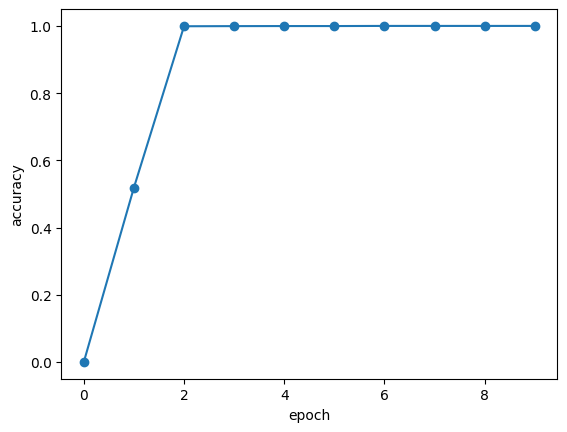

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(10), acc_list)
plt.scatter(range(10), acc_list)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

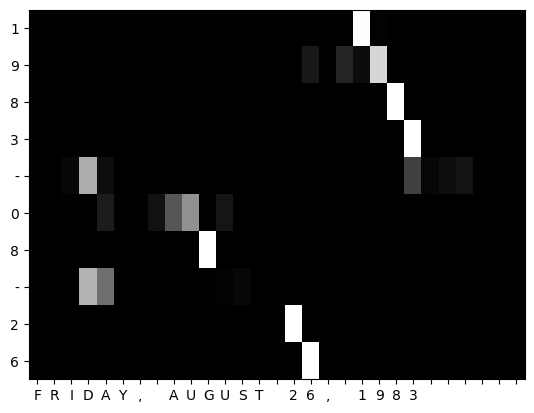

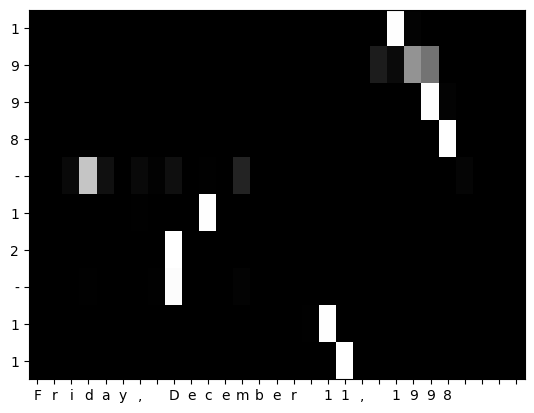

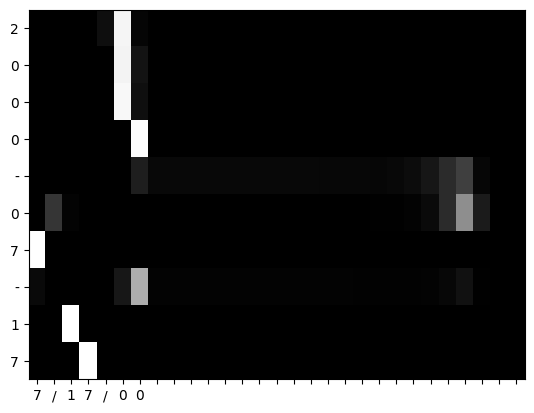

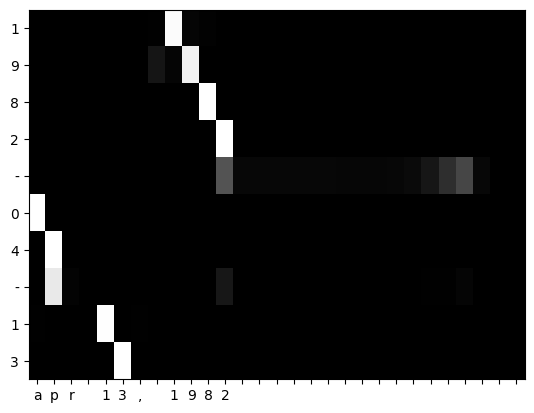

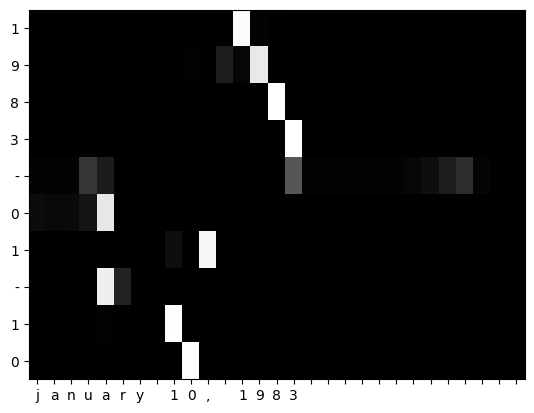

In [13]:
_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # reverse for print
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)


In [ ]:
j